# Librerias

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Token

In [3]:
# Coloca tu token personal de Banxico
BANXICO_TOKEN = "caa9ce3af73a7040c54f64908e2af98fd965b7c816828c6d90836ff2dd38a9d2"

serie_id = "SF43783"  # ID de la TIIE a 28 días
url = f"https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie_id}/datos"

headers = {"Bmx-Token": BANXICO_TOKEN}
response = requests.get(url, headers=headers)
data = response.json()

# Convertir a DataFrame
datos = data['bmx']['series'][0]['datos']
df = pd.DataFrame(datos)
df['fecha'] = pd.to_datetime(df['fecha'])
df['dato'] = pd.to_numeric(df['dato'], errors='coerce')
df = df.set_index('fecha').sort_index()

In [17]:
#analisis basico
df.isna().sum()
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7469 entries, 1995-03-23 to 2025-09-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dato    7469 non-null   float64
dtypes: float64(1)
memory usage: 116.7 KB


In [19]:
fig = px.line(df, x=df.index, y='dato', title='TIIE 28 días (histórico)')
fig.show()


In [23]:
result = adfuller(df['dato'])
print("p-value:", result[1])


p-value: 2.3374290847340835e-06


In [24]:
from statsmodels.tsa.stattools import kpss

# KPSS sobre la serie original
stat, p_value, lags, crit = kpss(df['dato'].dropna(), regression='c')

print('KPSS estadístico:', stat)
print('p-valor:', p_value)
print('Lags usados:', lags)
print('Valores críticos:', crit)

if p_value > 0.05:
    print("✅ No se rechaza H₀ → La serie es estacionaria")
else:
    print("⚠️ Se rechaza H₀ → La serie NO es estacionaria")


KPSS estadístico: 5.974510182867514
p-valor: 0.01
Lags usados: 53
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
⚠️ Se rechaza H₀ → La serie NO es estacionaria


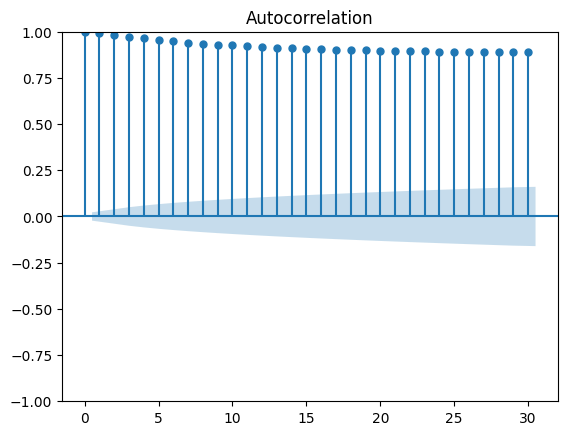

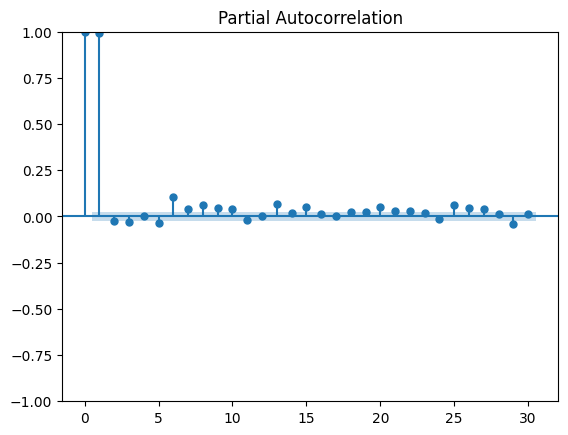

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['dato'], lags=30)
plot_pacf(df['dato'], lags=30)
plt.show()
